In [104]:
# This data set was compiled by Michael Brown in 2014. It contains 
# weekly data for the Dow Jones Industrial Index. The author warns that
# you can't use data from the same day to invest that day. I would also
# like to add my own warning that historical data on the stock market does
# NOT guarantee future performance will be the same or similar.

# Utility Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data import and preview
from ucimlrepo import fetch_ucirepo 
dow_jones_index = fetch_ucirepo(id=312) 
X = dow_jones_index.data.features 
print(X) 

     quarter stock       date    open    high     low   close     volume  \
0          1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1          1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2          1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3          1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4          1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   
..       ...   ...        ...     ...     ...     ...     ...        ...   
745        2   XOM  5/27/2011  $80.22  $82.63  $80.07  $82.63   68230855   
746        2   XOM   6/3/2011  $83.28  $83.75  $80.18  $81.18   78616295   
747        2   XOM  6/10/2011  $80.93  $81.87  $79.72  $79.78   92380844   
748        2   XOM  6/17/2011  $80.00  $80.82  $78.33  $79.02  100521400   
749        2   XOM  6/24/2011  $78.65  $81.12  $76.78  $76.78  118679791   

     percent_change_price  percent_change_volume_over_last_wk  \
0                 3.79

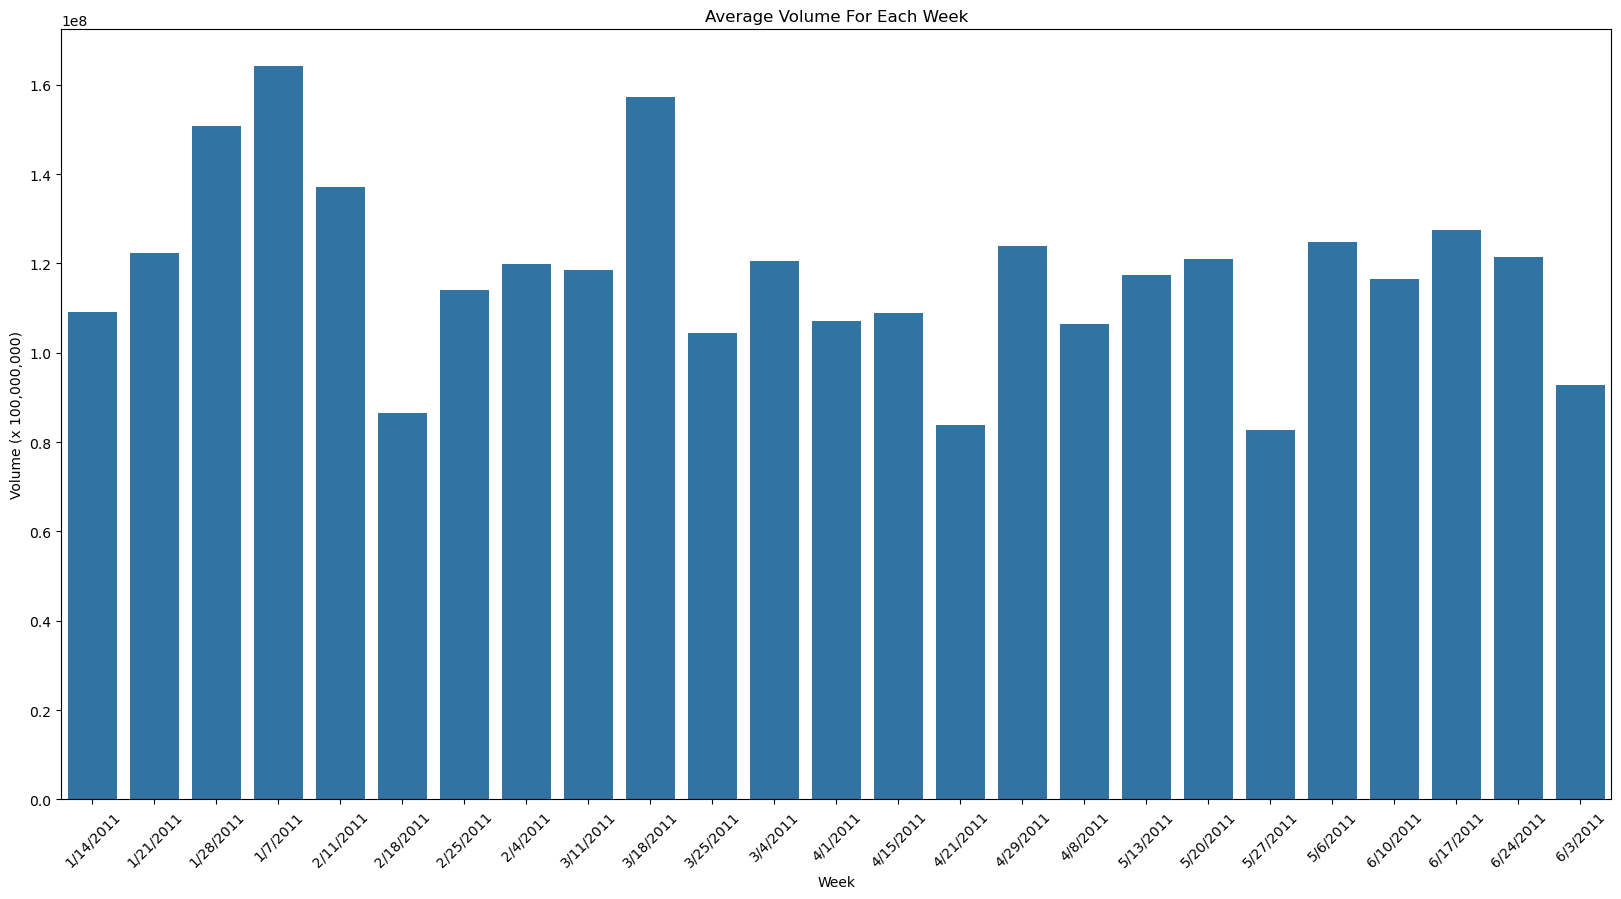

In [105]:
# This graph simply shows the average volume of the market for each week.
# There is no notable pattern from this data other than the fact that you can
# see that the volume fluctuates heavily. In terms of helping you understand the
# data the volume is in terms of a float to the power of 8 to make it easier to
# read on the y axis and the ticks on the x axis are tilted to ensure you can read
# them. This would be considered showing effectiveness. 

# Groups by volume mean of each date.
avg_volume = X.groupby("date", as_index=False)["volume"].mean()

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=avg_volume, x="date", y="volume")
plt.xticks(rotation=45)
plt.title("Average Volume For Each Week")
plt.xlabel("Week")
plt.ylabel("Volume (x 100,000,000)")
plt.show()

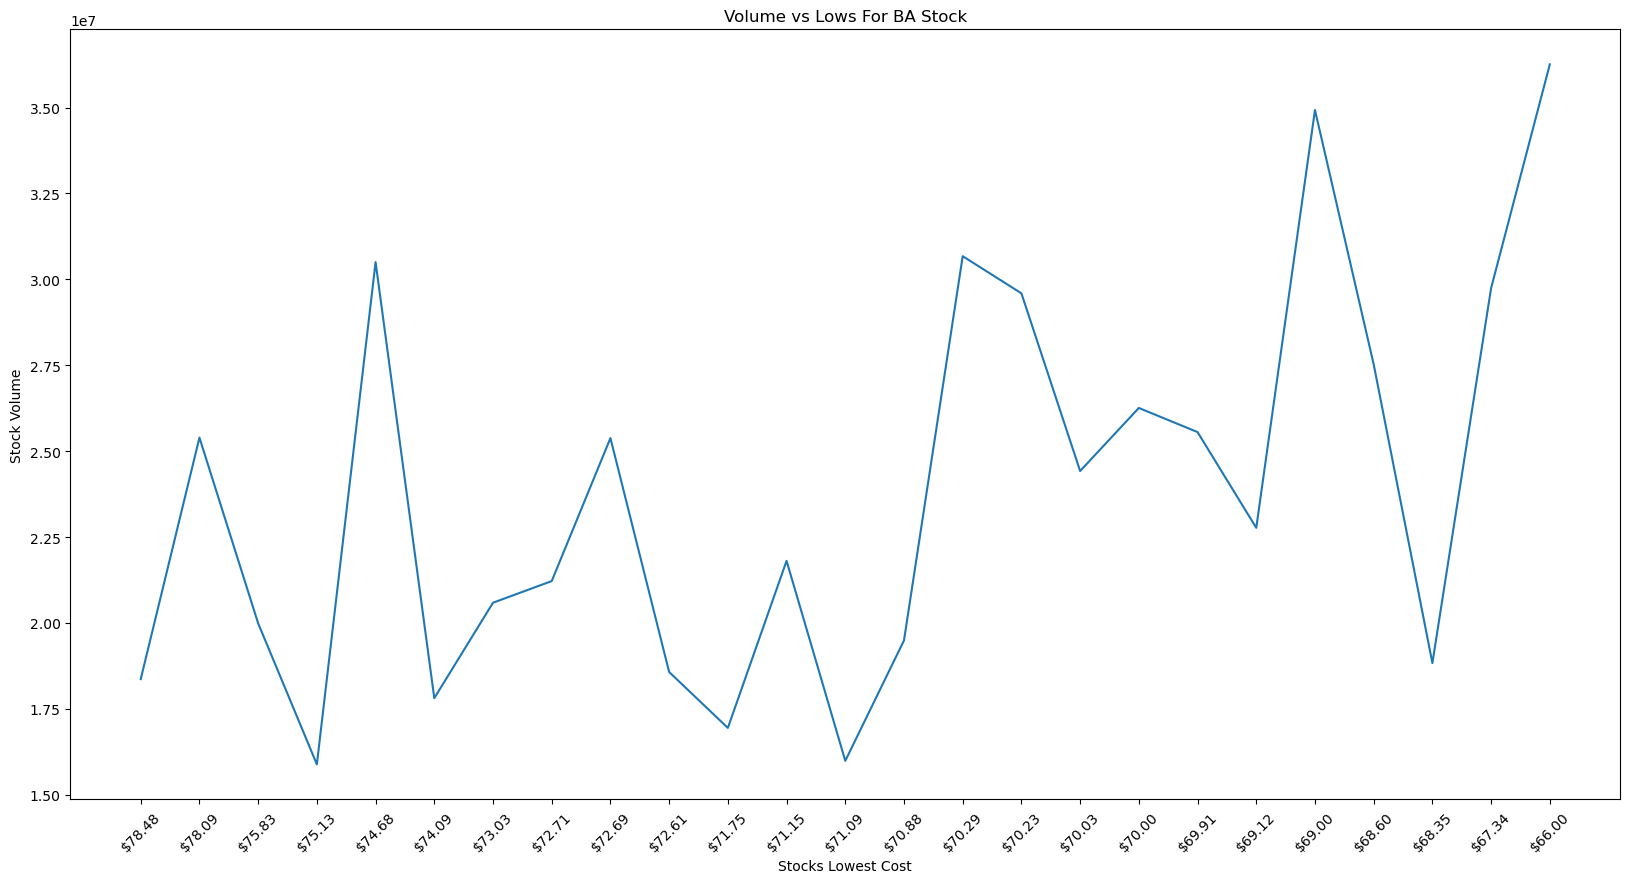

In [106]:
# This lineplot shows the relationship between the lows
# and the volume for a given stock. Notice here that as
# the lows increase, the volume increasing, telling us that
# as the stock gets cheaper, investors buy more of it.

# Filter the data for given stock.
xom_data = X[X["stock"] == "BA"]

# Sort the data.
xom_data_sorted = xom_data.sort_values("low", ascending=False)

plt.figure(figsize=(20, 10))
sns.lineplot(data=xom_data_sorted, x="low", y="volume")
plt.xticks(rotation=45)
plt.title("Volume vs Lows For BA Stock")
plt.xlabel("Stocks Lowest Cost")
plt.ylabel("Stock Volume")
plt.show()


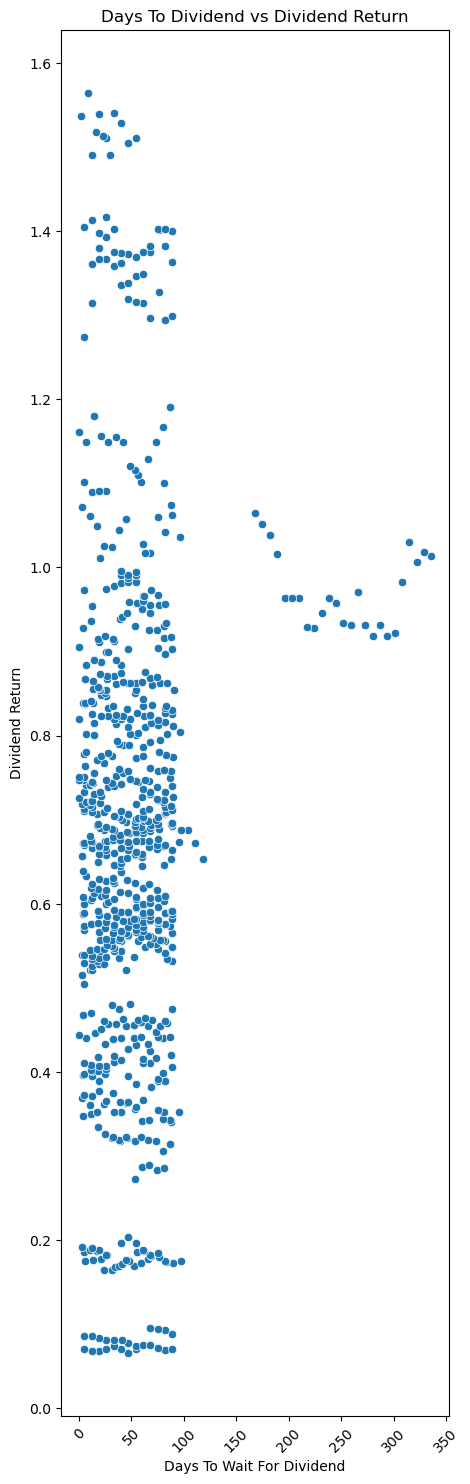

In [107]:
# This scatterplot shows the relatioship between the days to next 
# divided and the percent return for next dividend. As you can see
# most dividens are around the 0.4 to 1.0 mark between 0 and 100 days.
# Notice however for the 200-300 day waits for the next dividend the
# return is strictly near 1.0. This could indicate a different type
# of dividend being used by some stocks.

c = X['days_to_next_dividend']
d = X['percent_return_next_dividend']

# Sort values.
d_sorted = d.sort_values()
c_sorted = c.loc[d_sorted.index]

# Plot
plt.figure(figsize=(5, 18))
sns.scatterplot(x=c_sorted, y=d_sorted)
plt.xticks(rotation=45)
plt.title("Days To Dividend vs Dividend Return")
plt.xlabel("Days To Wait For Dividend")
plt.ylabel("Dividend Return")
plt.show()


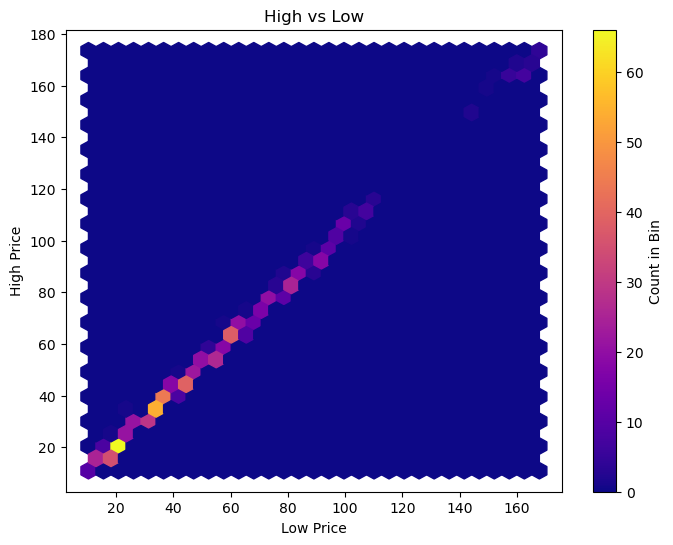

In [108]:
# This hexbin shows the simple relationship between the highs and lows of the market.
# The relationship is linearly increasing but does fluctuate.

# Removed $ from high and convert to float for proper use and sorting.
high = X['high'].replace('[$]', '', regex=True).astype(float)
low = X['low'].replace('[$]', '', regex=True).astype(float)

# Plot hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(low, high, gridsize=30, cmap='plasma')
plt.colorbar(label='Count in Bin')
plt.title("High vs Low")
plt.xlabel("Low Price")
plt.ylabel("High Price")
plt.show()

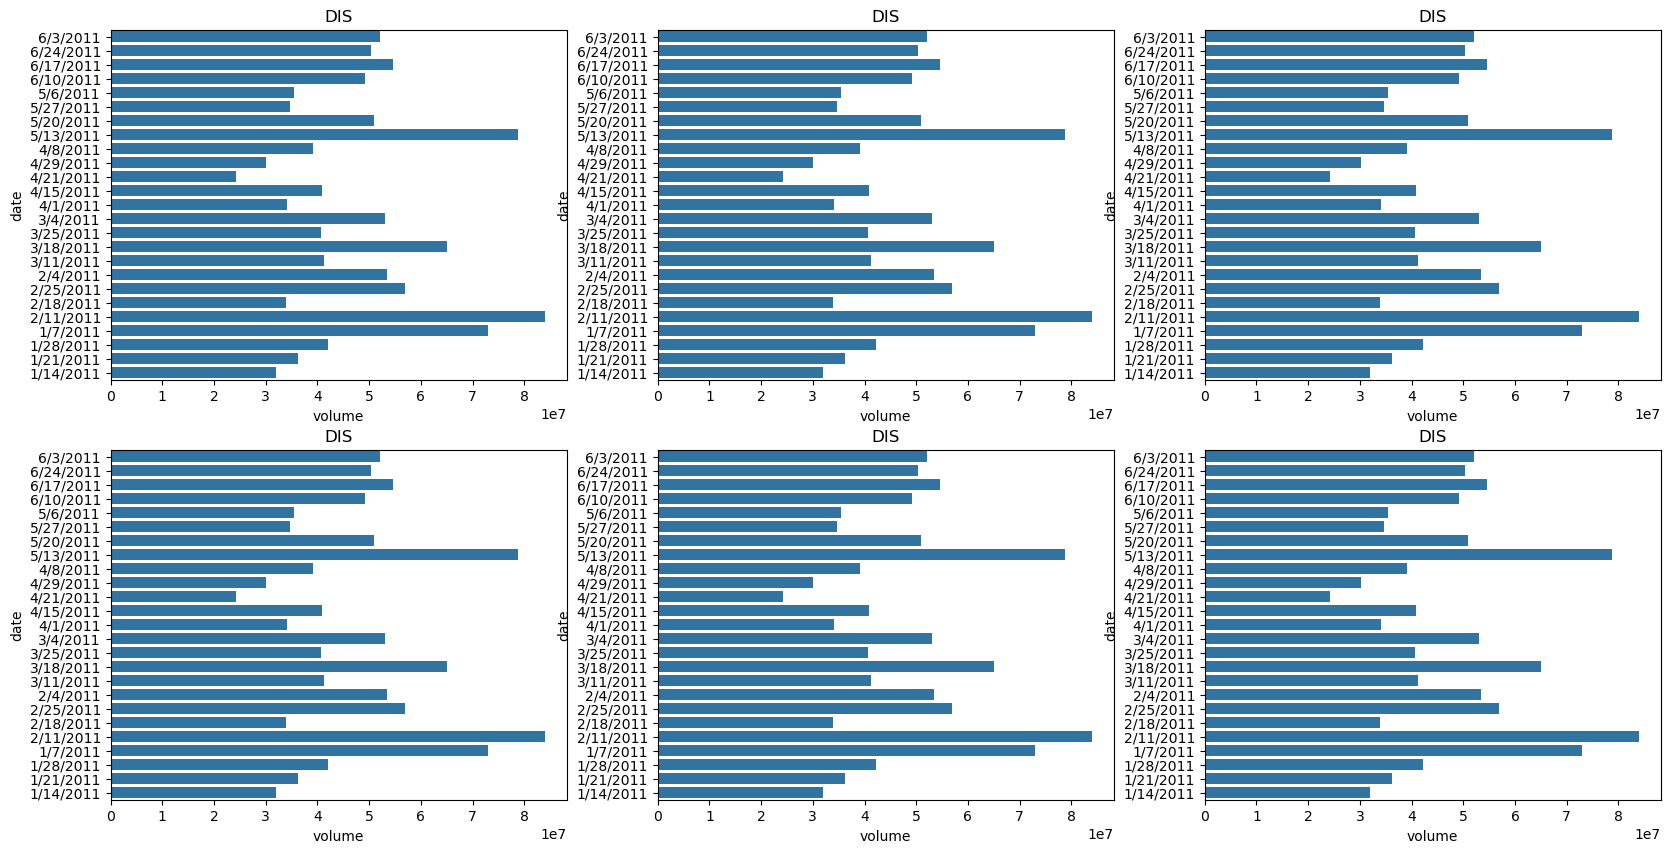

In [109]:
# This pairplot shows the date vs volume relationship for 6 individual
# stocks on a given date. Using this we can compare volume or any other
# metric we want between companies in an effective fashion.

# List of tickers
stocks = ["BA", "AA", "CAT", "AXP", "DD", "DIS"]

# Set up figures and axes.
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Creates each barplot from the list of stocks.
for i, stocks in enumerate(stocks):
    stock_data = X[X["stock"] == ticker].sort_values("date", ascending=False)
    
    sns.barplot(data=stock_data, x="volume", y="date", ax=axes[i])
    axes[i].set_title(f"{ticker}")
    axes[i].tick_params(axis='x')
plt.show()